In [191]:
import random
import math
import numpy as np___

In [204]:
files = ['train3.txt', 'train5.txt', 'test3.txt', 'test5.txt']
def parse_data(files):
    res = []
    for file in files:
        data = []
        f = open(file, 'r')
        for line in f:
            data.append([int(num) for num in line.strip('\n').split()])
        f.close()
        res.append(data)
    return res

xtrain3, xtrain5, xtest3, xtest5 = parse_data(files)

In [205]:
def shuffle_train_test_data(lst3, lst5):
    x = lst3 + lst5
    y = [0]*len(lst3) + [1]*len(lst5)
    
    pair = list(zip(x,y))
    random.shuffle(pair)
    x, y = zip(*pair)
    return np.array(x), np.array(y)
    
xtrain, ytrain = shuffle_train_test_data(xtrain3, xtrain5)
xtest, ytest = shuffle_train_test_data(xtest3, xtest5)

In [206]:
def sigmoid(wxs):
    return np.array([1 / (1 + math.exp(-wx)) for wx in wxs])

In [208]:
def log_likelihood(y, x, w):
    probabilities = sigmoid(x.dot(w))
    return np.sum([y[i] * math.log(probabilities[i]) + \
                   ((1 - y[i]) * math.log(1 - probabilities[i])) for i in range(len(y))])

In [209]:
def percent_error_rate(y, x, w):
    xws= x.dot(w)
    probabilities = sigmoid(xws)
    predictions = [1 if p >= 0.5 else 0 for p in probabilities]
    
    TP = sum(np.logical_and(predictions, y))
    FP = sum(np.logical_and(predictions, np.logical_not(y)))
    TN = sum(np.logical_and(np.logical_not(predictions), np.logical_not(y)))
    FN = sum(np.logical_and(np.logical_not(predictions), y))

    return ((FP + FN) / (TP + FP + TN + FN)) * 100

In [207]:
def gradient(y, x, w):
    lst = y - sigmoid(x.dot(w))
    return np.sum((np.expand_dims(lst, axis=1) * x), axis=0)

In [210]:
def hessian(x, w):
    xws = np.dot(x, w)
    xneg_ws = np.dot(x, -w)
    sigmoid_xw = sigmoid(xws)
    sigmoid_neg_xw = sigmoid(xneg_ws)
    sigmoid_values = (sigmoid_xw * sigmoid_neg_xw)
    matrix = x.T.dot(x)
    mats = [s* matrix for s in sigmoid_values ]
    res = -np.sum(mats, axis = 0)
    return res

In [211]:
from numpy.linalg import inv
w = np.array([0 for i in range(64)])   
likelihoods = []
error_rates = []
i = 0
laps = 100000
flag = False
lr = 0.2/len(xtrain3)
while i != laps:
    error_rates.append(percent_error_rate(ytrain, xtrain, w))
    likelihoods.append(log_likelihood(ytrain, xtrain, w))
    new_w = w - (inv(hessian(xtrain, w)).dot(gradient(ytrain, xtrain, w)))
    unstable_rate = np.sum(abs(new_w - w)) 
    if unstable_rate < 0.00001:
        flag = True
    w = new_w
    i += 1
print(flag)

True


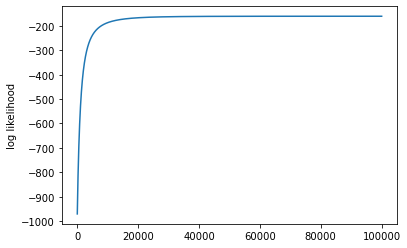

In [219]:
import matplotlib.pyplot as plt
plt.plot(likelihoods)
plt.ylabel('log likelihood')
plt.show()

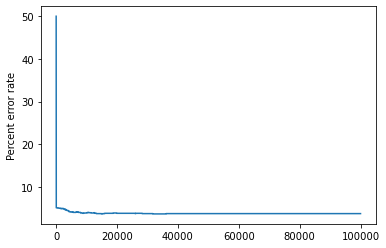

In [220]:
plt.plot(error_rates)
plt.ylabel('Percent error rate')
plt.show()

In [221]:
print('Training set:')
print('Percent error rate: ', error_rates[-1])
print('Log likelihood:', likelihoods[-1])

Training set:
Percent error rate:  3.785714285714286
Log likelihood: -160.69814815107603


In [222]:
w.reshape((8, 8))

array([[-0.70057501, -1.77271155, -1.09274556, -1.54546654, -0.61218004,
        -1.18725509,  0.80232358,  1.96583364],
       [-0.30175903, -0.27097233,  0.33413686, -0.03534105, -0.69379691,
         0.99823062, -1.4893718 , -1.50412454],
       [ 4.50569297,  1.38875869,  1.61855154,  0.09832064,  1.0263743 ,
        -2.45881789, -2.45884311, -2.92812516],
       [ 0.74765373,  0.36246313,  0.78738491, -0.36221933, -0.52984011,
        -2.79251022,  0.53198913, -0.06437286],
       [ 0.66238577,  1.32323881,  0.11021316, -0.47892754, -0.62789355,
        -0.03120808, -0.66854084, -0.06542244],
       [ 1.33431475, -0.29794494, -0.45579334, -0.22093484, -0.05175143,
        -1.16184154,  1.02975744, -1.88373429],
       [ 1.74577439, -0.77759437,  1.41996249,  0.73329063,  0.53727973,
        -0.47067696,  0.12279395, -1.75409747],
       [ 0.74040218,  0.35778161,  0.77862666,  2.70277385,  0.42920666,
         0.7495536 ,  0.98244034, -0.62956044]])

In [218]:
print('Testing set:')
print('Percent error rate: ', percent_error_rate(ytest, xtest, w))
print('Log likelihood: ', log_likelihood(ytest, xtest, w))

Testing Data:
Percent Error Rate:  6.625
Log Likelihood:  -126.7971008281362
